In [1]:
from bunkatech.topic_modeling.topics import TopicModeling
import pandas as pd
import bamboolib
import plotly.express as px
import plotly 

In [22]:
data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

data = data.sample(9000)

In [3]:
# All the basic components to compute before more specialized computation
topics = TopicModeling(data = data,
                        text_var = 'description',
                        index_var = 'imdb',
                        extract_terms=True,
                        terms_embedding=False,
                        docs_embedding=True,
                        sample_size_terms=1000,
                        terms_limit=3000,
                        terms_ents=False,
                        terms_ngrams=(2, 2),
                        terms_ncs=False,
                        terms_include_pos=["NOUN", "PROPN", "ADJ"],
                        terms_include_types=["PERSON", "ORG"],
                        terms_embedding_model="distiluse-base-multilingual-cased-v1",
                        docs_embedding_model="tfidf",
                        language="en",
                        terms_path=None,
                        terms_embeddings_path=None,
                        docs_embeddings_path=None,
                        docs_dimension_reduction = 5)

Extract Terms: 100%|██████████████████████████| 995/995 [00:10<00:00, 93.58it/s]


UMAP(n_components=5, verbose=True)
Sun Mar 20 07:28:08 2022 Construct fuzzy simplicial set
Sun Mar 20 07:28:09 2022 Finding Nearest Neighbors
Sun Mar 20 07:28:11 2022 Finished Nearest Neighbor Search
Sun Mar 20 07:28:15 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Mar 20 07:28:19 2022 Finished embedding


In [7]:
res = topics.get_clusters(topic_number=15, top_terms = 3)

In [14]:
fig_3d = topics.visualize_topics_embeddings_3d(width= 1000, height = 1000)

UMAP(n_components=3, verbose=True)
Sun Mar 20 07:47:25 2022 Construct fuzzy simplicial set
Sun Mar 20 07:47:25 2022 Finding Nearest Neighbors
Sun Mar 20 07:47:25 2022 Finished Nearest Neighbor Search
Sun Mar 20 07:47:25 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Mar 20 07:47:27 2022 Finished embedding


In [18]:
fig = topics.temporal_topics(date_var = 'year', 
                             width=1000,
                            height=500,
                            normalize_y=False,
                            min_range=2000,
                            max_range=2020)

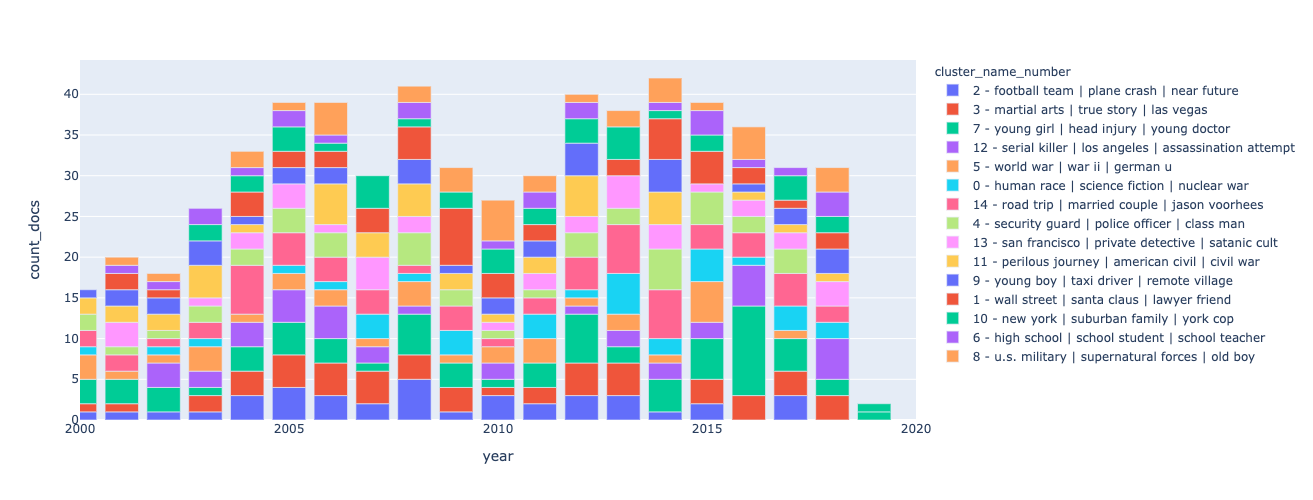

In [19]:
fig.show()

In [20]:
topics.get_centroid_documents()

,clusters,centroid_docs,farest_doc,cluster_radius
0,14 - road trip | married couple | jason voorhees,Three friends discover their new flatmate dead...,"Hoping to walk away with a massive fortune, a ...",1.289141
1,7 - young girl | head injury | young doctor,"After losing her job, making out with her soon...","After leaving her philandering husband, an ele...",1.595060
2,9 - young boy | taxi driver | remote village,"A rude, contemptuous talk show host becomes ov...",After discovering that an asteroid the size of...,1.492261
3,2 - football team | plane crash | near future,"Blair, a fighter pilot, joins an interstellar ...",A hot shot Washington DC lobbyist and his prot...,1.463501
4,12 - serial killer | los angeles | assassinati...,A logger defends his family from a group of da...,Four skaters follow their idol on his summer t...,1.470694
5,1 - wall street | santa claus | lawyer friend,Tommy Riley has moved with his dad to Chicago ...,Having recovered from wounds received in a fai...,1.563509
6,0 - human race | science fiction | nuclear war,"At a home for retired musicians, the annual co...",A comedic look at the relationship between a w...,1.191426
7,10 - new york | suburban family | york cop,"A giant, reptilian monster surfaces, leaving d...",A woman sets out to make life a living hell fo...,1.732996
8,8 - u.s. military | supernatural forces | old boy,A teenage girl and her father discover alien c...,Ashwat Raina and his teammates arrive in Pokhr...,1.460702
9,5 - world war | war ii | german u,When a group of friends fail to lower the ladd...,An introvert freshman is taken under the wings...,1.341478
